In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import gorillatracker.utils.cvat_import as cvat_import
import gorillatracker.utils.visualizer_helpers as vh

/opt/conda/envs/research/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_path = "/workspaces/gorillatracker/data/ground_truth/cxl"
cvat_path = f"{base_path}/full_images_body_instance_segmentation/cvat_export.xml"
img_path = f"{base_path}/full_images/"
segmented_gorilla_images = cvat_import.cvat_import(cvat_path, img_path)

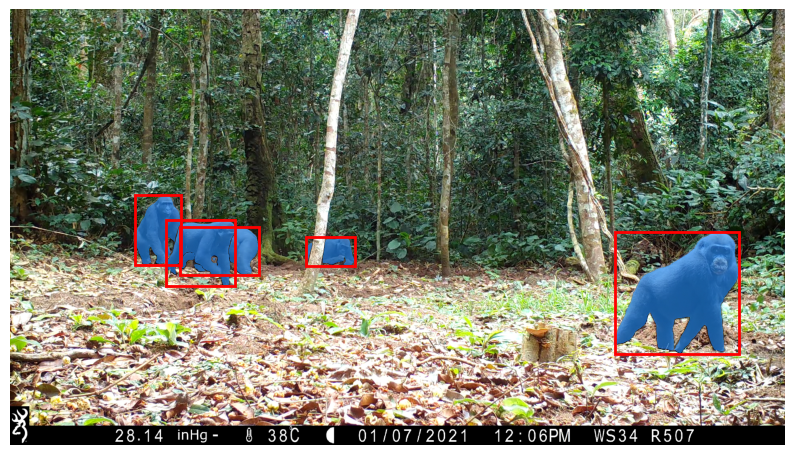

In [3]:
segmented_gorilla_image = random.choice(segmented_gorilla_images) 

gorilla_image = cv2.imread(segmented_gorilla_image.path)
gorilla_image = cv2.cvtColor(gorilla_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(gorilla_image)
plt.axis("off")
for class_label, segments in segmented_gorilla_image.segments.items():
    for mask, box in segments:
        vh.show_sam_box(box, plt.gca())
        vh.show_sam_mask(mask, plt.gca())
plt.show()

[[[105 159 112]
  [ 95 149 102]
  [ 62 104  68]
  ...
  [103 110 116]
  [126 133 139]
  [102 109 115]]

 [[101 155 108]
  [ 91 145  98]
  [ 59 101  65]
  ...
  [109 116 122]
  [134 141 147]
  [103 110 116]]

 [[ 48 109  61]
  [ 33  94  46]
  [  0  47  10]
  ...
  [112 119 125]
  [129 136 142]
  [ 95 102 108]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]] ((385, 521), (557, 685))
[[[105 159 112]
  [ 95 149 102]
  [ 62 104  68]
  ...
  [103 110 116]
  [126 133 139]
  [102 109 115]]

 [[101 155 108]
  [ 91 145  98]
  [ 59 101  65]
  ...
  [109 116 122]
  [134 141 147]
  [103 110 116]]

 [[ 48 109  61]
  [ 33  94  46]
  [  0  47  10]
  ...
  [112 119 125]
  [129 136 142]
  [ 95 102 108]]

 ...

 [[  0   0   0]
  [  0   0 

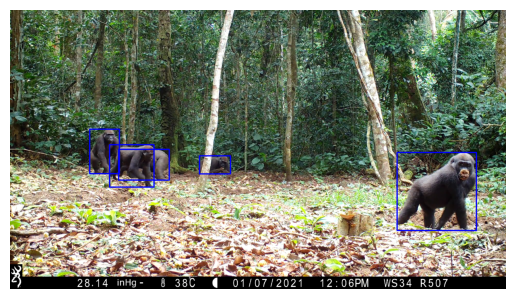

In [4]:
filename = segmented_gorilla_image.path.split("/")[-1].split(".")[0]
bbox_path = f"{base_path}/full_images_body_bbox/{filename}.txt"
vh.show_yolo_box(segmented_gorilla_image.path, bbox_path)